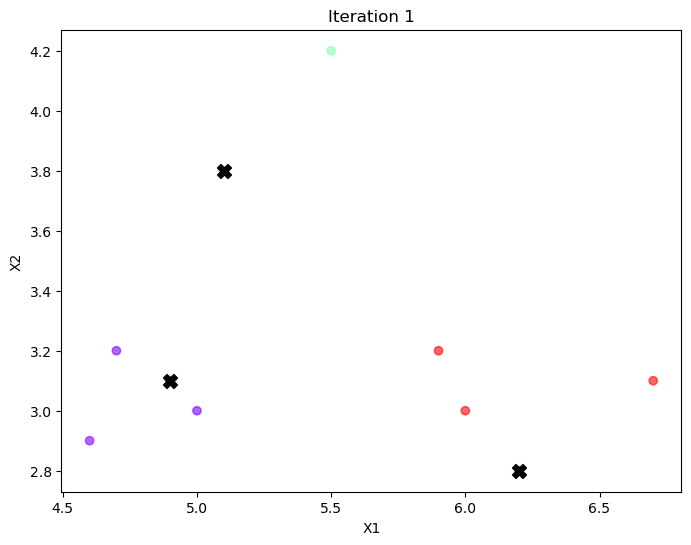

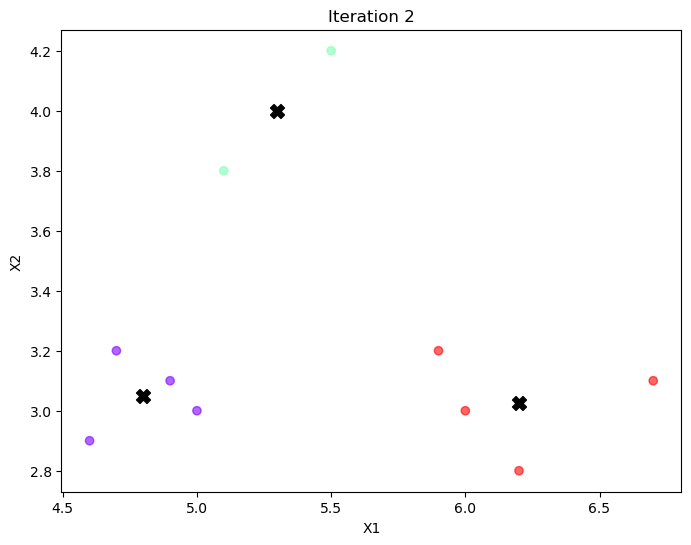

Final Cluster Centers:
[[4.8   3.05 ]
 [5.3   4.   ]
 [6.2   3.025]]
Total Number of Iterations: 1


In [1]:
import pandas  as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv('Kmeans.csv')
df.head()
def initialize_centers(X, k):
    indices = np.random.choice(len(X), k, replace=False)
    return X.iloc[indices].values

def assign_to_clusters(X, centers):
    distances = np.linalg.norm(X.values[:, np.newaxis, :] - centers, axis=2)
    return np.argmin(distances, axis=1)

def update_centers(X, labels, k):
    return np.array([np.mean(X.values[labels == i], axis=0) for i in range(k)])

def k_means(data, k, max_iterations=100, tol=1e-4):
    centers = initialize_centers(data, k)
    prev_centers = np.zeros_like(centers)
    centers_over_iterations = [centers]

    for iteration in range(1, max_iterations + 1):
        labels = assign_to_clusters(data, centers)
        centers = update_centers(data, labels, k)

        if np.linalg.norm(centers - prev_centers) < tol:
            break

        centers_over_iterations.append(centers)
        prev_centers = np.array(centers)

    return centers_over_iterations

def plot_iteration(data, centers, iteration):
    plt.figure(figsize=(8, 6))
    labels = assign_to_clusters(data, centers)
    plt.scatter(data['X1'], data['X2'], c=labels, cmap='rainbow', alpha=0.6)
    plt.scatter(centers[:, 0], centers[:, 1], c='black', marker='X', s=100)
    plt.title(f'Iteration {iteration}')
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.show()

data = df
K = 3

# Run K-Means clustering
centers_over_iterations = k_means(data, K)

# Create a scatter plot for each iteration
for i, centers in enumerate(centers_over_iterations):
    plot_iteration(data, centers, i + 1)

# Print the final cluster centers
final_centers = centers_over_iterations[-1]
print("Final Cluster Centers:")
print(final_centers)

# Print the total number of iterations
print("Total Number of Iterations:", len(centers_over_iterations) - 1)
